## import library

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

## load data and data check

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

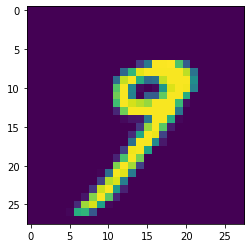

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


In [3]:
plt.figure()
plt.imshow(x_train[33])
plt.show()

print(x_train)
print(y_train)

## data preprocessing (x reshape, x normalize, y onshot)

In [4]:
shape = x_train.shape[1:] # 

# x data reshape
reshaped_x_train = x_train.reshape(-1, np.prod(shape))
reshpaed_x_test = x_test.reshape(-1, np.prod(shape))

# x data normalization
X_train = reshaped_x_train / 255.
X_test = reshpaed_x_test / 255.

# y data one hot encoding
Y_train = np.eye(10)[y_train.reshape(-1)]
Y_test = np.eye(10)[y_test.reshape(-1)]

In [5]:
print('X data shape: ', X_train.shape, X_test.shape)
print('Y data shape: ', Y_train.shape, Y_test.shape)
print()

print('X train data')
print(X_train)


X data shape:  (60000, 784) (10000, 784)
Y data shape:  (60000, 10) (10000, 10)

X train data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
learning_rate = 1e-1
training_epochs = 25
display_step = 5
batch_size = 32
act = tf.nn.relu
h = 200

In [7]:
# get variables

tf.reset_default_graph()

# placeholder

tf_X = tf.placeholder(tf.float32, [None, np.prod(shape)])
tf_Y = tf.placeholder(tf.float32, [None, 10])

# get variables
w1 = tf.get_variable('w1', [np.prod(shape), h])
b1 = tf.get_variable('b1', [h])
w2 = tf.get_variable('w2', [h, 10])
b2 = tf.get_variable('b2', [10])

# model
hidden1 = act(tf_X @ w1 + b1)
pred = tf.nn.softmax(hidden1 @ w2 + b2)

# cross entropy loss
loss = tf.reduce_mean(-tf.reduce_sum(tf_Y * tf.log(pred), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

W0821 16:36:20.047800 140350472591104 deprecation.py:506] From /home/pirl/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Train and batch

In [8]:
#train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    losses = [sess.run(loss, feed_dict={tf_X:X_train, tf_Y:Y_train})]
    for epoch in range(training_epochs):
        _,I = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_Y:Y_train})
        losses.append(I)
        if (epoch+1)% display_step ==0:
            print("Epoch:", epoch + 1, '\tLoss:',I)
            
    print('최적화 완료')    
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, yu_test_pred = sess.run([accuracy, pred], feed_dict={tf_X:X_test, tf_Y:Y_test})
    print('정확도:',test_accuracy)

Epoch: 5 	Loss: 1.9994541
Epoch: 10 	Loss: 1.6372236
Epoch: 15 	Loss: 1.3493774
Epoch: 20 	Loss: 1.1373724
Epoch: 25 	Loss: 0.9867249
최적화 완료
정확도: 0.8012
